# Notes from Python for Finance Cookbook

In [1]:
print("Python Investment Aid")

Python Investment Aid


#### Data Gathering

In [2]:
import pandas as pd
import yfinance as yf
from datetime import date
import numpy as np

import pyfredapi as pf
from rich import print as rprint
from rich.pretty import pprint

from matplotlib import pyplot as plt

from dotenv import load_dotenv





load_dotenv()

last_years=1
last_month=6
today = date.today().replace(month=date.today().month-2)
start_date = today.replace(year=date.today().year-last_years)

stock_ticker='META'

print("today ",today)
print("start", start_date)


def init_ticker(name):
    return yf.Ticker(name)


stock = init_ticker(stock_ticker)
stock.history(period="1mo")



/Users/abhisawa/git/pyworkspace/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


today  2023-10-10
start 2022-10-10


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-09 00:00:00-05:00,319.420013,324.179993,318.799988,320.549988,16103100,0.0,0.0
2023-11-10 00:00:00-05:00,319.940002,329.100006,319.459991,328.769989,19096200,0.0,0.0
2023-11-13 00:00:00-05:00,326.200012,332.329987,325.700012,329.190002,16908900,0.0,0.0
2023-11-14 00:00:00-05:00,334.540009,338.100006,333.329987,336.309998,17179400,0.0,0.0
2023-11-15 00:00:00-05:00,337.929993,338.399994,330.019989,332.709991,14531200,0.0,0.0
2023-11-16 00:00:00-05:00,329.369995,334.579987,326.380005,334.190002,18932600,0.0,0.0
2023-11-17 00:00:00-05:00,330.260010,335.500000,329.350006,335.040009,14494400,0.0,0.0
2023-11-20 00:00:00-05:00,334.890015,341.869995,334.190002,339.970001,16960500,0.0,0.0
2023-11-21 00:00:00-05:00,338.329987,339.899994,335.899994,336.980011,12027900,0.0,0.0


#### Returns on an investment


Simple returns formula

$R_{t} = \left (P_{t} - P_{t-1}\right )/P_{t-1} = P_{t}/P_{t-1} -1$

***


Log returns formula

$r_{t} = log\left( P_{t}/P_{t-1}\right ) = log(P_{t}) - log(P_{t-1})$

Article which explains [log returns](https://gregorygundersen.com/blog/2022/02/06/log-returns/)

In [3]:
df = yf.download(stock_ticker,
                 start=start_date,
                 end=today,
                 progress=False)
df = df.loc[:, ["Adj Close"]]

df["simple_rtn"] = df["Adj Close"].pct_change()

%matplotlib inline
x=df["Date"]
y=df["simple_rtn"]
fig=plt.figure()
ax=fig.add_axes(0,0,10,10)
ax.plot(x,y)


df["log_rtn"] = np.log(df["Adj Close"]/df["Adj Close"].shift(1))

df.head()

,Adj Close,simple_rtn,log_rtn
Date,,,
2022-10-10,133.789993,NaN,NaN
2022-10-11,128.539993,-0.039241,-0.040031
2022-10-12,127.500000,-0.008091,-0.008124
2022-10-13,130.289993,0.021882,0.021646
2022-10-14,126.760002,-0.027093,-0.027467


#### Inflation Adjustments


Inflation calculation 

${R{r}}^{t} = \frac{1+R{t}}{1+\pi{t}} - 1$


${R{r}}^{t}$ = real returns

$R{t}$ = simple returns over t period

$\pi{t}$ = inflation rate



Through one of the formula which made sense to me was from [here](https://timeseriesreasoning.com/contents/inflation-adjustment/)

${Inflation\ Adjusted\ Value} = \frac{Current\ Value\ of\ the\ Asset}{Inflation\ Index\ Value} \times 100$

In [4]:
df = df.resample("M").last()

df_copy =  df.copy()

# fetch inflation data from FRED APIs
cpi_sc = pf.SeriesCollection(series_id=["USACPALTT01CTGYM"])
df_cpi = cpi_sc.USACPALTT01CTGYM.df.tail(120).rename(columns={'USACPALTT01CTGYM':'inflation_rate'})
df_cpi['inflation_rate'] = df_cpi['inflation_rate'] / 100

df.reset_index(inplace=True)

df['Month_Year'] = df['Date'].dt.to_period('M')
df_cpi['Month_Year'] = df_cpi['date'].dt.to_period('M')
df.set_index('Month_Year', inplace=True)
df_cpi.set_index('Month_Year', inplace=True)

df = df.join(df_cpi, how="left")
df["real_rtn"] = (
    (df["simple_rtn"] + 1) / (df["inflation_rate"] + 1) - 1
)

# display all panda dataframe rows
pd.set_option('display.max_rows', 10)

display(df)


Requesting series USACPALTT01CTGYM...


,Date,Adj Close,simple_rtn,log_rtn,date,inflation_rate,real_rtn
Month_Year,,,,,,,
2022-10,2022-10-31,93.160004,-0.060887,-0.062819,2022-10-01,0.077467,-0.128407
2022-11,2022-11-30,118.099998,0.078933,0.075973,2022-11-01,0.071283,0.007140
2022-12,2022-12-31,120.339996,0.000665,0.000665,2022-12-01,0.065167,-0.060555
2023-01,2023-01-31,148.970001,0.012988,0.012904,2023-01-01,0.063317,-0.047332
2023-02,2023-02-28,174.940002,0.031851,0.031354,2023-02-01,0.059044,-0.025677
...,...,...,...,...,...,...,...
2023-06,2023-06-30,286.980011,0.019359,0.019174,2023-06-01,0.029716,-0.010058
2023-07,2023-07-31,318.600006,-0.021138,-0.021365,2023-07-01,0.031607,-0.051129
2023-08,2023-08-31,295.890015,0.002677,0.002674,2023-08-01,0.036966,-0.033066


#### Volitility Adjustments


Realized volitility assesses variation in returns for an investment product by analyzing its historical returns within a defined period. 

Variance in daily returns of the underlying calculated as follows:

$r_{t} = log(P_{today}) - log(P_{yesterday})$

P = stock price 
t = one day period

$r_{t}$ = Variance in daily value 

This variance is accumulated in Realized Variance:

$\sum_{i=1}^{N}r_{t}^{2}$

And Realized Volitility is square root of Realized Variance 

$\sqrt{\sum_{i=1}^{N}r_{t}^{2}}$


In [5]:
# Calculation of realized variance 
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

# monthly realized volatility 
#  equivalent of  df["log_rtn"].resample("M").mean()
df_rv = (
    df_copy.groupby(pd.Grouper(freq="M"))   
    .apply(realized_volatility)
    .rename(columns={"log_rtn": "rv"})
)

# Annulalized the values of realized volatility 
df_rv.rv = df_rv["rv"] * np.sqrt(12)


df_rv.head()


,Adj Close,simple_rtn,rv
Date,,,
2022-10-31,93.160004,0.060887,0.217613
2022-11-30,118.099998,0.078933,0.263177
2022-12-31,120.339996,0.000665,0.002303
2023-01-31,148.970001,0.012988,0.044702
2023-02-28,174.940002,0.031851,0.108614


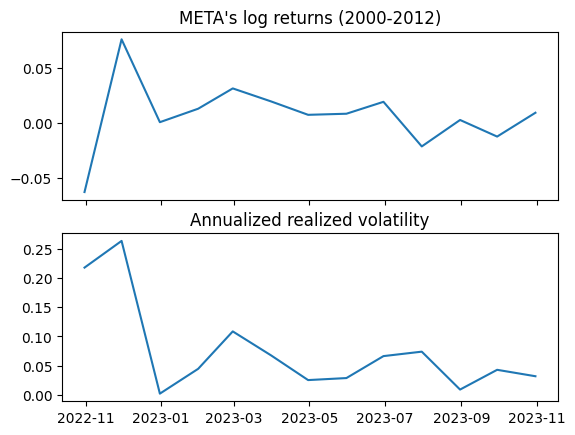

In [6]:
# Plotting data

import matplotlib.pyplot as plt


fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df_copy['log_rtn'])
ax[0].set_title(f"{stock_ticker}'s log returns (2000-2012)")
ax[1].plot(df_rv['rv'])
ax[1].set_title("Annualized realized volatility")
plt.show()


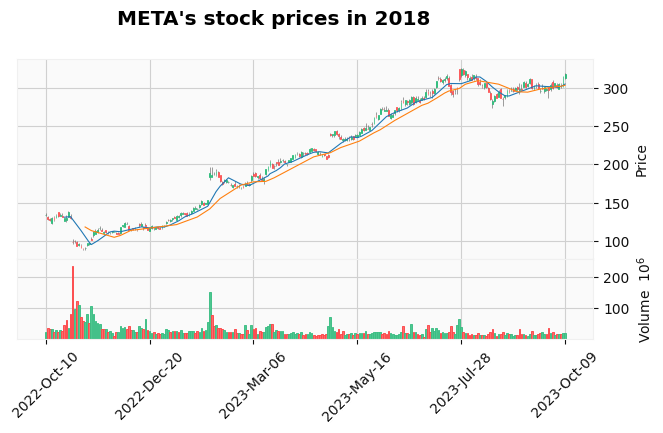

In [7]:
import mplfinance as mpf

df = yf.download(stock_ticker,
                 start=start_date,
                 end=today,
                 progress=False,
                 auto_adjust=True)

mpf.plot(df, type="candle",
         mav=(10, 20),
         volume=True,
         style="yahoo",
         title=f"{stock_ticker}'s stock prices in 2018",
         figsize=(8, 4))


In [8]:
import cufflinks as cf
from plotly.offline import iplot
cf.go_offline()

qf = cf.QuantFig(
    df, title=f"{stock_ticker}'s Stock Price",
    legend="top", name=f"{stock_ticker}'s stock prices in 2018"
)

qf.add_volume()
#qf.add_sma(periods=20, column="Close", color="red")
qf.add_ema(periods=50, color="red")
qf.add_ema(periods=20, color="green")

qf.iplot()


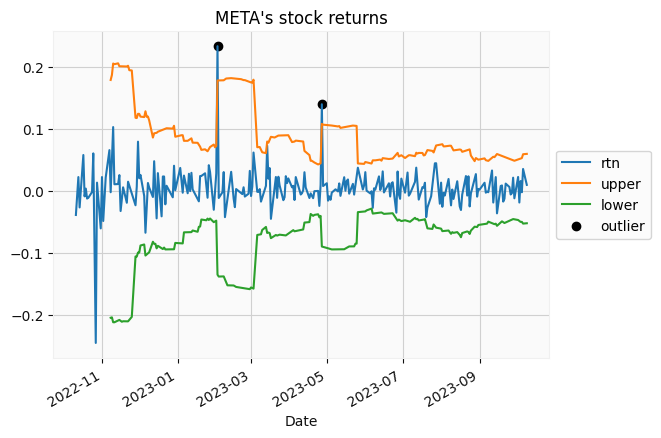

In [16]:

df = yf.download(stock_ticker,
                 start=start_date,
                 end=today,
                 progress=False)


df["rtn"] = df["Adj Close"].pct_change()
df = df[["rtn"]].copy()

df_rolling = df[["rtn"]].rolling(window=21) \
                        .agg(["mean", "std"])

df_rolling.columns = df_rolling.columns.droplevel()
df = df.join(df_rolling)

N_SIGMAS = 3
df["upper"] = df["mean"] + N_SIGMAS * df["std"]
df["lower"] = df["mean"] - N_SIGMAS * df["std"]

df["outlier"] = (
    (df["rtn"] > df["upper"]) | (df["rtn"] < df["lower"])
)

fig, ax = plt.subplots()
df[["rtn", "upper", "lower"]].plot(ax=ax)
ax.scatter(df.loc[df["outlier"]].index,
           df.loc[df["outlier"], "rtn"],
           color="black", label="outlier")
ax.set_title(f"{stock_ticker}'s stock returns")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()